In [18]:
import numpy as np
import sklearn
import warnings
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.neural_network 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

# Neural Network MLP Classifier 

In [51]:
#get_data
data_downSampling = np.genfromtxt('dataset_down_sampling.csv', delimiter=",")
data_upSampling = np.genfromtxt('dataset_up_sampling.csv', delimiter=",")


#functions
def splitData(data):
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data[:, :-1], 
                                                                                    data[:,-1],
                                                                                    train_size=0.8, random_state=0)

    return X_train , y_train, X_test, y_test


def evaluateModel(X_train,y_train,X_test,y_test,model):
    y_pred = model.predict(X_train)
    trainA = sklearn.metrics.accuracy_score(y_train,y_pred)*100
    print("Training accuracy: %.3f%%"%trainA)
    y_pred2 = model.predict(X_test)
    testA = sklearn.metrics.accuracy_score(y_test,y_pred2)*100
    print("Testing accuracy: %.3f%%"%testA)
    precision = sklearn.metrics.precision_score(y_test, y_pred2)*100
    recall = sklearn.metrics.recall_score(y_test, y_pred2)*100
    roc = roc_auc_score(y_test,y_pred2)*100
    print("Precision: %.3f%%"%precision)
    print("Recall: %.3f%%"%recall)
    print("ROC: %.3f%%"%roc)
    
    return trainA, testA, precision, recall, roc

#grid search for best params
def gridSearch(hiddenLayer,X_train,y_train):
    lr = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=hiddenLayer, max_iter=100,random_state=0)
    a = [0.0001,0.001,0.01,0.1,1]
    activ = ['logistic', 'tanh', 'relu']
    sol = ['lbfgs', 'sgd', 'adam'] 
    param_grid = {'activation' : activ, 'alpha' : a, 'solver' : sol}
    gridSearch = sklearn.model_selection.GridSearchCV(lr,param_grid=param_grid, verbose=1,cv=[(slice(None), slice(None))])#no cv
    gridSearch.fit(X_train,y_train)
    return gridSearch;

def hiddenLayers_scores():
    i = 1
    scores = []
    for n in [nn,nn2,nn3,nn4,nn5,nn6]:
        print("Hidden Layer Structure",i,"Best Parameters:",n.best_params_,"Score: %.3f"%n.best_score_)
        scores.append(n.best_score_*100)
        i+=1
    return scores

def plot(values, title, color):
    plt.figure()
    plt.bar(np.arange(1,7), values, color=color)
    plt.ylim(50,80)
    plt.ylabel('Score')
    plt.xlabel('Hidden_Layer_Structure')
    plt.title(title);

def plotConfusionMatrix(X_test,y_test,model,title):
    
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)    
    
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

#feature analysis plot
def featurePlot(labels,scores,title,color):
    
    plt.figure(figsize=(16, 8))
    plt.bar(labels,scores, color=color, edgecolor='black')
    plt.title(title)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.ylim(0,0.2)
    plt.ylabel('Importance %')

#feature importance estimation
#source:("Estimating feature importance, the easy way" by Romain Hardy)
def get_feature_importance(j, n,clf,X_test,y_test):
    y_pred = clf.predict(X_test)
    s = sklearn.metrics.accuracy_score(y_test, y_pred) # baseline score
    total = 0.0
    for i in range(n):
        perm = np.random.permutation(range(X_test.shape[0]))
        X_test_ = X_test.copy()
        X_test_[:, j] = X_test[perm, j]
        y_pred_ = clf.predict(X_test_)
        s_ij = sklearn.metrics.accuracy_score(y_test, y_pred_)
        total += s_ij
    return s - total / n
#source:("Estimating feature importance, the easy way" by Romain Hardy)
def get_feature_scores(clf,X_test,y_test):
    
    f = []
    for j in range(X_test.shape[1]):
        f_j = get_feature_importance(j, 100,clf,X_test,y_test)
        f.append(f_j)
    return f

Hidden Layers Structure

In [4]:
#6 different NN hidden layer structure tested
#structure 1
hiddenLayer1 = (10,)
#structure 2
hiddenLayer2 = (10,4)
#structure 3
hiddenLayer3 = (10,8,6,4)
#structure 4
hiddenLayer4 = (10,9,8,7,6,5,4,3,2)
#structure 5
hiddenLayer5 = (10,20,10)
#structure 6
hiddenLayer6 = (11,10,9,8,7,6,5,4,3,2,1)

# Using Up Sampled Data

In [5]:
#upSampling data split
X_train_up , y_train_up, X_test_up, y_test_up = splitData(data_upSampling)

print(X_train_up.shape)
print(X_test_up.shape)

(20072, 11)
(5018, 11)


In [6]:
#uncomment and run only if re-training best estimators(High computation time)
#grid search already excecuted and saved for quick running

'''
#gridSearch for each type of hidden Layer
#estimators saved to file to run without re-training. 
nn = gridSearch(hiddenLayer1,X_train_up , y_train_up)
pickle.dump(nn,open('nnSave/nn1_up.sav', 'wb'))  

nn2 = gridSearch(hiddenLayer2,X_train_up , y_train_up)
pickle.dump(nn2,open('nnSave/nn2_up.sav', 'wb'))

nn3 = gridSearch(hiddenLayer3,X_train_up , y_train_up)
pickle.dump(nn3,open('nnSave/nn3_up.sav', 'wb'))

nn4 = gridSearch(hiddenLayer4,X_train_up , y_train_up)
pickle.dump(nn4,open('nnSave/nn4_up.sav', 'wb'))

nn5 = gridSearch(hiddenLayer5,X_train_up , y_train_up)
pickle.dump(nn4,open('nnSave/nn5_up.sav', 'wb'))

nn6 = gridSearch(hiddenLayer6,X_train_up , y_train_up)
pickle.dump(nn6,open('nnSave/nn6_up.sav', 'wb'))
'''

Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits


In [7]:

#load objs from file
nn = pickle.load(open('nnSave/nn1_up.sav', 'rb'))
nn2 = pickle.load(open('nnSave/nn2_up.sav', 'rb'))
nn3 = pickle.load(open('nnSave/nn3_up.sav', 'rb'))
nn4 = pickle.load(open('nnSave/nn4_up.sav', 'rb'))
nn5 = pickle.load(open('nnSave/nn5_up.sav', 'rb'))
nn6 = pickle.load(open('nnSave/nn6_up.sav', 'rb'))

#get scores
scores = hiddenLayers_scores()

Hidden Layer Structure 1 Best Parameters: {'activation': 'logistic', 'alpha': 0.01, 'solver': 'adam'} Score: 0.731
Hidden Layer Structure 2 Best Parameters: {'activation': 'logistic', 'alpha': 0.01, 'solver': 'adam'} Score: 0.725
Hidden Layer Structure 3 Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'solver': 'adam'} Score: 0.741
Hidden Layer Structure 4 Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'solver': 'adam'} Score: 0.748
Hidden Layer Structure 5 Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'solver': 'adam'} Score: 0.748
Hidden Layer Structure 6 Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'solver': 'adam'} Score: 0.728


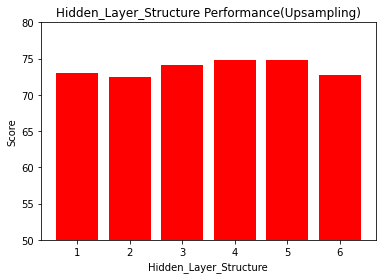

In [8]:
#visualize performance
plot(scores, 'Hidden_Layer_Structure Performance(Upsampling)', 'r')

In [9]:
print("Best Hidden Layer Structure: 5, Parameters:",nn5.best_params_)

Best Hidden Layer Structure: 5, Parameters: {'activation': 'tanh', 'alpha': 0.1, 'solver': 'adam'}


In [10]:
#re-training using best param on higher max_iterations(1000)
nnBest_up = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=hiddenLayer5,activation='tanh',alpha=0.1,max_iter=1000,random_state=0,verbose=False)
nnBest_up.fit(X_train_up,y_train_up);

In [35]:
trainA_u,testA_u,precision_u,recall_u,roc_u = evaluateModel(X_train_up,y_train_up,X_test_up,y_test_up,nnBest_up);

Training accuracy: 73.759%
Testing accuracy: 73.754%
Precision: 73.410%
Recall: 75.237%
ROC: 73.741%


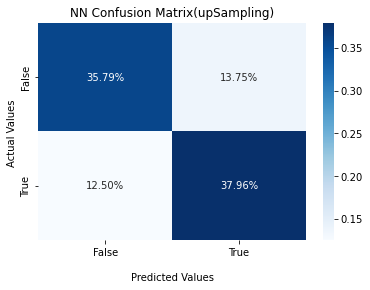

In [29]:
#plot confusion matrix as a heatmap
plotConfusionMatrix(X_test_up,y_test_up,nnBest_up,"NN Confusion Matrix(upSampling)")

# Using down Sampled data

In [20]:
#upSampling data split
X_train_down , y_train_down, X_test_down, y_test_down = splitData(data_downSampling)

print(X_train_down.shape)
print(X_test_down.shape)


(6051, 11)
(1513, 11)


In [21]:
#uncomment and run only if re-training best estinators(High computation time)
#scores already calculated and saved for quick running
'''
#gridSearch for each type of hidden Layer
nn = gridSearch(hiddenLayer1,X_train_down , y_train_down)
pickle.dump(nn,open('nnSave/nn1_down.sav', 'wb'))

nn2 = gridSearch(hiddenLayer2,X_train_down , y_train_down)
pickle.dump(nn2,open('nnSave/nn2_down.sav', 'wb'))

nn3 = gridSearch(hiddenLayer3,X_train_down , y_train_down)
pickle.dump(nn3,open('nnSave/nn3_down.sav', 'wb'))

nn4 = gridSearch(hiddenLayer4,X_train_down , y_train_down)
pickle.dump(nn4,open('nnSave/nn4_down.sav', 'wb'))

nn5 = gridSearch(hiddenLayer5,X_train_down , y_train_down)
pickle.dump(nn4,open('nnSave/nn5_down.sav', 'wb'))

nn6 = gridSearch(hiddenLayer6,X_train_down , y_train_down)
pickle.dump(nn6,open('nnSave/nn6_down.sav', 'wb'))
'''

Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits
Fitting 1 folds for each of 45 candidates, totalling 45 fits


In [22]:

#load objs from file
nn = pickle.load(open('nnSave/nn1_down.sav', 'rb'))
nn2 = pickle.load(open('nnSave/nn2_down.sav', 'rb'))
nn3 = pickle.load(open('nnSave/nn3_down.sav', 'rb'))
nn4 = pickle.load(open('nnSave/nn4_down.sav', 'rb'))
nn5 = pickle.load(open('nnSave/nn5_down.sav', 'rb'))
nn6 = pickle.load(open('nnSave/nn6_down.sav', 'rb'))

scores = hiddenLayers_scores()

Hidden Layer Structure 1 Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'solver': 'adam'} Score: 0.689
Hidden Layer Structure 2 Best Parameters: {'activation': 'tanh', 'alpha': 1, 'solver': 'adam'} Score: 0.710
Hidden Layer Structure 3 Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'solver': 'adam'} Score: 0.716
Hidden Layer Structure 4 Best Parameters: {'activation': 'tanh', 'alpha': 1, 'solver': 'adam'} Score: 0.705
Hidden Layer Structure 5 Best Parameters: {'activation': 'tanh', 'alpha': 1, 'solver': 'adam'} Score: 0.705
Hidden Layer Structure 6 Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'solver': 'adam'} Score: 0.718


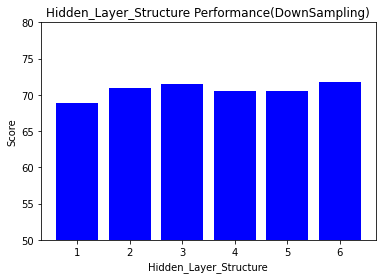

In [23]:
#visualize performance
plot(scores, 'Hidden_Layer_Structure Performance(DownSampling)', 'b')

In [24]:
print("Best Hidden Layer Structure: 6, Parameters:",nn6.best_params_)

Best Hidden Layer Structure: 6, Parameters: {'activation': 'tanh', 'alpha': 0.1, 'solver': 'adam'}


In [32]:
#re-training using best param on higher max_iterations(1000)
nnBest_down = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=hiddenLayer5,activation='tanh',alpha=0.1,max_iter=1000,random_state=0,verbose=False)
nnBest_down.fit(X_train_down,y_train_down);

In [36]:
trainA_d,testA_d,precision_d,recall_d,roc_d = evaluateModel(X_train_down,y_train_down,X_test_down,y_test_down,nnBest_down);

Training accuracy: 71.558%
Testing accuracy: 69.332%
Precision: 68.661%
Recall: 70.306%
ROC: 69.339%


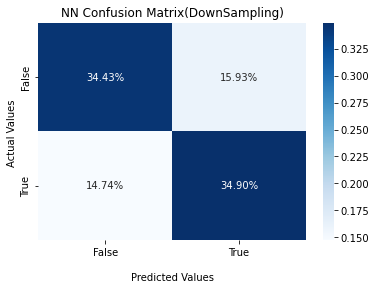

In [34]:
#plot confusion matrix as a heatmap
plotConfusionMatrix(X_test_down,y_test_down,nnBest_down,"NN Confusion Matrix(DownSampling)")

#                                       Performance Visualization

Text(0, 0.5, 'ROC %')

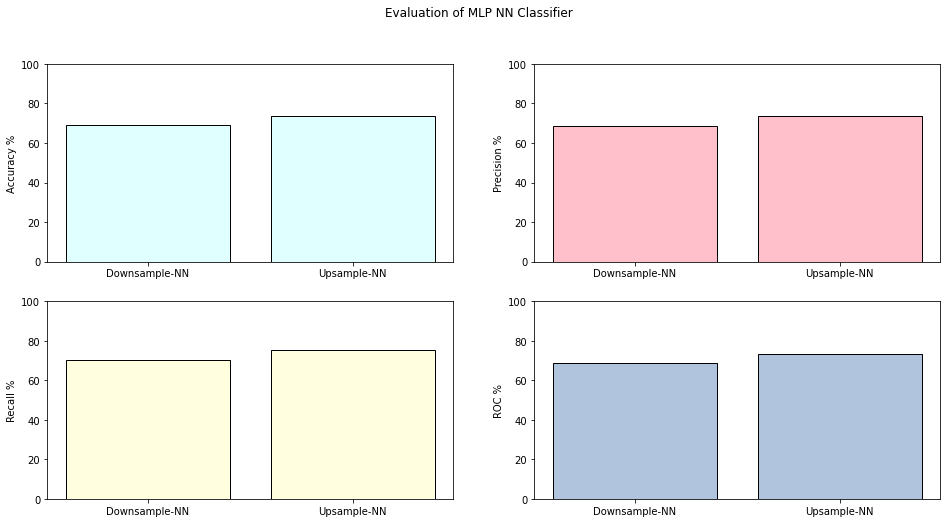

In [55]:
#Performance evaluation
labels = ['Downsample-NN', 'Upsample-NN']
accuracies = [testA_d,testA_u]
precision = [precision_d,precision_u]
recall = [recall_d,recall_u]
roc = [roc_d,roc_u]

plt.figure(figsize=(16, 8))
plt.suptitle('Evaluation of MLP NN Classifier');
plt.subplot(2,2,1)
plt.bar(labels,accuracies, color='lightcyan', edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Accuracy %')

plt.subplot(2,2,2)
plt.bar(labels,precision, color='pink',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Precision %')

plt.subplot(2,2,3)
plt.bar(labels,recall,color='lightyellow',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Recall %')

plt.subplot(2,2,4)
plt.bar(labels,precision, color='lightsteelblue',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('ROC %')

# Feature Importance Analysis

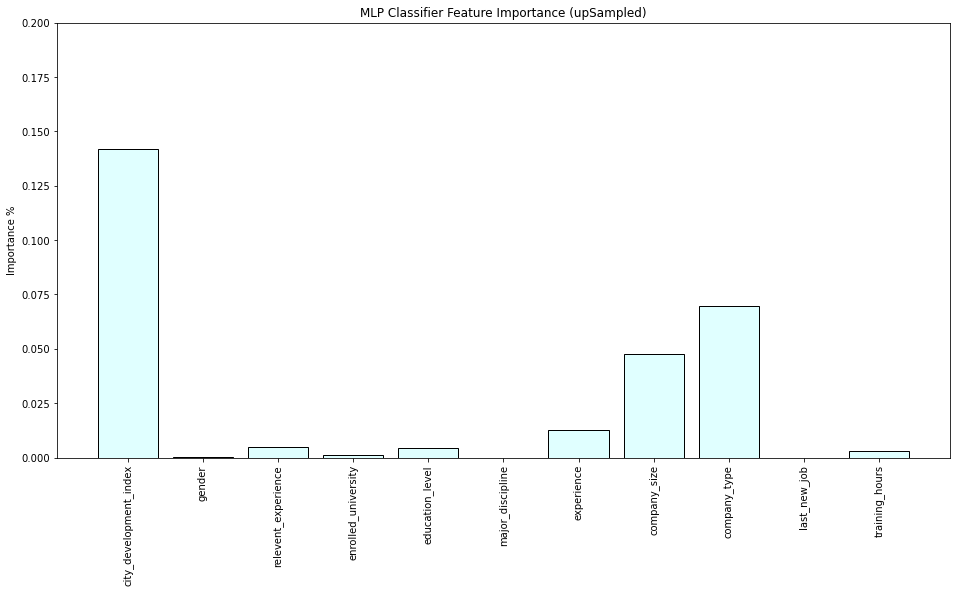

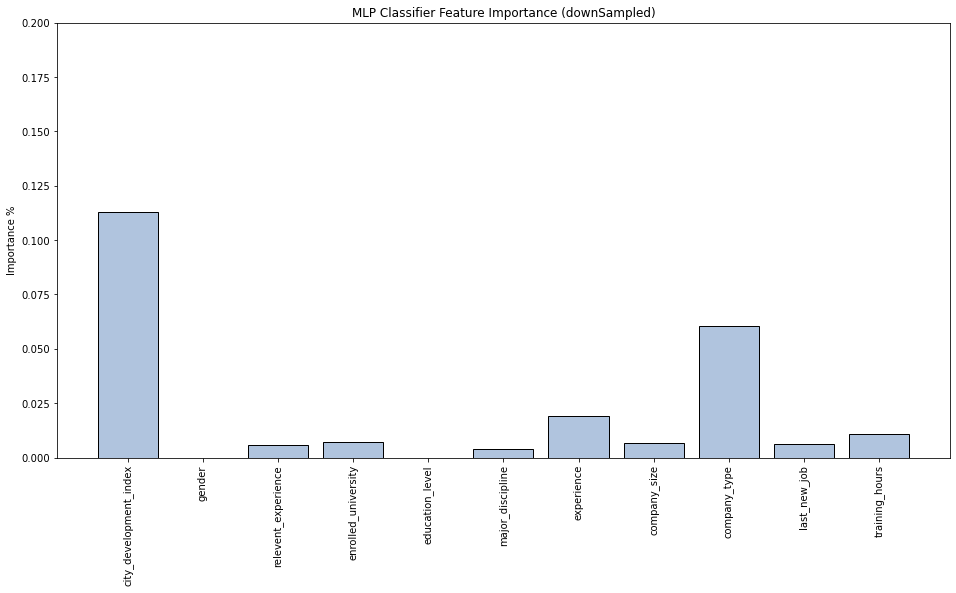

In [54]:
nn_up = get_feature_scores(nnBest_up,X_test_up,y_test_up)
nn_down = get_feature_scores(nnBest_down,X_test_down,y_test_down)

labels = ['city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours']

featurePlot(labels,nn_up,"MLP Classifier Feature Importance (upSampled)",'lightcyan')
featurePlot(labels,nn_down,"MLP Classifier Feature Importance (downSampled)",'lightsteelblue')

